# Further analysis of Diabetes Prediction

In [28]:

import pandas as pd
import seaborn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicat
# dataset ^^^
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", header=0)
diabetes= data.query('Diabetes_012 == 0 or Diabetes_012 ==2')
diabetes = diabetes.replace(2,1)
sample = diabetes.sample(n=30000, random_state=1)
diabetes1 = sample.loc[:, diabetes.columns != 'Diabetes_012']

scaler = StandardScaler()
data_scaled = scaler.fit_transform(diabetes1)
Z = linkage(data_scaled, method='average')
diabetes1['group'] = fcluster(Z, t= 7.7, criterion='distance')
diabetes1['Diabetes_012'] =  sample['Diabetes_012']



train, test = train_test_split(diabetes1, test_size=.3, random_state=1)

y = train['Diabetes_012']
x = train.loc[:, train.columns != 'Diabetes_012']

y_test = test['Diabetes_012']
x_test = test.loc[:, test.columns != 'Diabetes_012']



Evaluation = pd.DataFrame({
    "Model":[],
    "Accuracy":[], 
    "True Positive":[],
    "True Negative":[], 
    "False Positive":[],
    "False Negative":[],

})


In [32]:
x1 = x.drop('Education', axis=1)
x1 = x1.drop('CholCheck', axis=1)
x1 = x1.drop('AnyHealthcare', axis=1)
x1 = x1.drop('BMI', axis=1)
x1 = x1.drop('Veggies', axis=1)
x1 = x1.drop('Stroke', axis=1)
x1 = x1.drop('NoDocbcCost', axis=1)
x1 = x1.drop('group', axis=1)
x1 = x1.drop('MentHlth', axis=1)
x1 = x1.drop('Smoker', axis=1)
x1 = x1.drop('Fruits', axis=1)


x1_test = x_test.drop('Education', axis=1)
x1_test = x1_test.drop('CholCheck', axis=1)
x1_test = x1_test.drop('AnyHealthcare', axis=1)
x1_test = x1_test.drop('BMI', axis=1)
x1_test = x1_test.drop('Veggies', axis=1)
x1_test = x1_test.drop('Stroke', axis=1)
x1_test = x1_test.drop('NoDocbcCost', axis=1)
x1_test = x1_test.drop('group', axis=1)
x1_test = x1_test.drop('MentHlth', axis=1)
x1_test = x1_test.drop('Smoker', axis=1)
x1_test = x1_test.drop('Fruits', axis=1)

import statsmodels.api as sm

x1 = sm.add_constant(x1)
log_model = sm.Logit(y,x1)
log_results = log_model.fit()

print(log_results.summary())



Optimization terminated successfully.
         Current function value: 0.332793
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20988
Method:                           MLE   Df Model:                           11
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                  0.1882
Time:                        10:08:41   Log-Likelihood:                -6988.7
converged:                       True   LL-Null:                       -8608.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.4556      0.127    -35.146      0.000      -4.704      -4.207

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x1_test = sm.add_constant(x1_test)

log_pred_prob = log_results.predict(x1_test)
# Convert probabilities to binary predictions
log_pred = [1 if x >= 0.5 else 0 for x in log_pred_prob]

#Evaluation
conf_matrix_log = confusion_matrix(y_test, log_pred)

accuracy_log = accuracy_score(y_test, log_pred)
print("Accuracy:")
print(accuracy_log)
print("Confusion Matrix:")
print(conf_matrix_log)



Accuracy:
0.8614444444444445
Confusion Matrix:
[[7610  153]
 [1094  143]]


In [34]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation= 'relu', max_iter=400,
                    hidden_layer_sizes=(10,5, 2), random_state=1, alpha=.01)

nn.fit(x, y)

nn_pred = nn.predict(x_test)
# Evaluation
accuracy = accuracy_score(y_test, nn_pred)
print("Accuracy:", accuracy_score(y_test, nn_pred))
nn_conf  = confusion_matrix(y_test, nn_pred)
print(nn_conf)
print("Classification Report:\n", classification_report(y_test, nn_pred))

Accuracy: 0.8625555555555555
[[7763    0]
 [1237    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93      7763
         1.0       0.00      0.00      0.00      1237

    accuracy                           0.86      9000
   macro avg       0.43      0.50      0.46      9000
weighted avg       0.74      0.86      0.80      9000



c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\corkr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# New Variables 
    New variables maybe needed to produce a better preforming model. This can be done with clustering into n number of groups and labeling the nubmer of the group as a new variable. This could improve the accuracy of the logistic regression model by seperating it into n different logistic regression models(multiple logistic regression by cluster) as well improve the accuracy of other models as well. I also suspect that the dataset will contain "groupings" which could be effected by simpson's paradox. 

Use method below but group by maximum probability that each obseravtion belongs to a group. 

How is this done 
    mean and vairance to test p-value through hypothesis testing. 

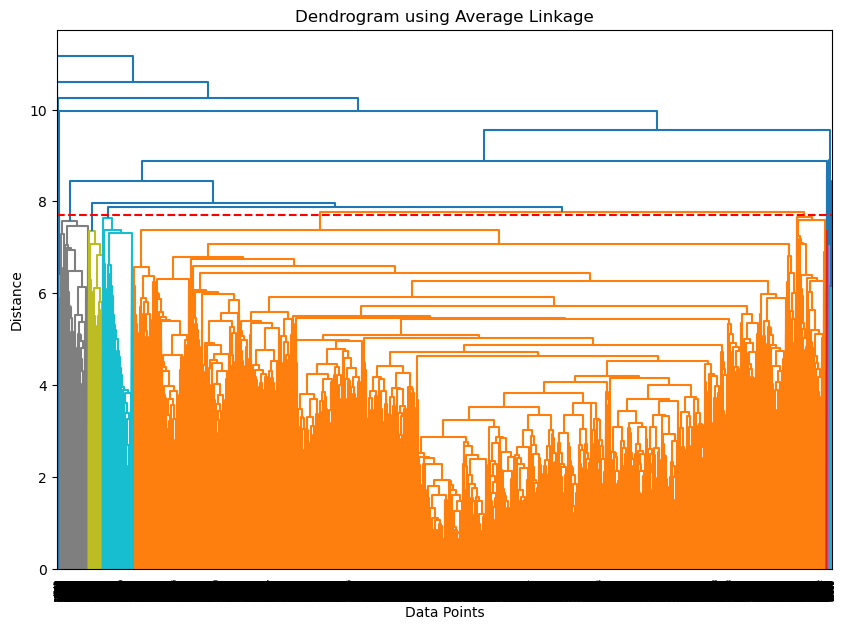

In [12]:
# clustering to define groups 
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler


# Step 1: Standardize the Data (optional, but recommended)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

# Step 2: Perform Hierarchical Clustering with Average Linkage
Z = linkage(data_scaled, method='average')

# Step 3: Plot the Dendrogram to Determine the Optimal Number of Clusters
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram using Average Linkage")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.axhline(y=7.7, color='r', linestyle='--') 
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

Z = linkage(data_scaled, method='average')
x_diabetes['group'] = fcluster(Z, t= 7.7, criterion='distance')

x.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,group
24530,0.0,1.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,16
69326,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,8.0,4.0,8.0,16
28415,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0,17
191859,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,30.0,0.0,0.0,7.0,4.0,8.0,16
237665,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0,16


In [43]:
# Deep Neural Network

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Generate or load your data (replace this with your actual dataset)
# X is the feature matrix, and y is the binary target variable (0 or 1)

# Standardize features
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.transform(x_test)



# Define the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x.shape[1],)),
    Dropout(0.3),  # Dropout layer for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='relu')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x, y, epochs=50, batch_size=100, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(accuracy)
print(conf_matrix)

tn, fp, fn, tp = conf_matrix.ravel()
Evaluation_50 = Evaluation._append({
    "Model": "DNN",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)




print(f"Test Set Accuracy: {accuracy:.4f}")


Epoch 1/50


c:\Users\corkr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8412 - loss: 1.8443 - val_accuracy: 0.8576 - val_loss: 0.4981
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8318 - loss: 0.7380 - val_accuracy: 0.8581 - val_loss: 0.3893
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8321 - loss: 0.5397 - val_accuracy: 0.8588 - val_loss: 0.3833
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8454 - loss: 0.4588 - val_accuracy: 0.8583 - val_loss: 0.3824
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.8436 - loss: 0.4627 - val_accuracy: 0.8586 - val_loss: 0.3848
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8505 - loss: 0.4374 - val_accuracy: 0.8590 - val_loss: 0.3769
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8587 - loss: 0.4302 - val_accuracy: 0.8595 - val_loss: 0.3647
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8517 - loss: 0.4301 - val_accuracy: 0

In [ ]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(
    iterations=1000,        # Number of boosting iterations
    learning_rate=0.01,     # Learning rate
    depth=7,               # Depth of each tree
    verbose=0              # Set to 0 to turn off logging
)

# Train the model
model.fit(x, y)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Accuracy:", accuracy)


[[7611  152]
 [1028  209]]
Accuracy: 0.8688888888888889


In [49]:
test.groupby(['Diabetes_012']).count()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,group
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,7763,7763,7763,7763,7763,7763,7763,7763,7763,7763,...,7763,7763,7763,7763,7763,7763,7763,7763,7763,7763
1.0,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,...,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
